<a href="https://colab.research.google.com/github/EduardoPeLima/Portfolio_DataSciece/blob/main/%5BAN%C3%81LISE_DE_DADOS%5D_AIRBNB_BERLIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Análise dos Dados do Airbnb - Berlim</h1>
O <a href="https://www.airbnb.com.br">Airbnb</a> é um serviço que permite que os proprietários aluguem seus espaços para viajantes que procuram um lugar para ficar. Os viajantes podem alugar diversos tipos de espaços, desde um espaço para várias pessoas compartilharem, um espaço compartilhado com quartos privativos ou toda uma propriedade.

No final de 2018, a Startup fundada 10 anos atrás, já havia hospedado mais de 300 milhões de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="./imagens/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Berlim, na Alemanha, e ver quais insights podem ser extraídos a partir de dados brutos.**

<h2>Uma breve Introdução ao Turismo em Berlim</h2>

<h3>Mitte, O grande Coração da Cidade de Berlim<h3>
<left><img alt="Pontos Turísticos de Berlim" style="object-fit: contain;" src="./imagens/berlim_mapa.jpg" ></left>

Numa parte da antiga Berlim Oriental, tínhamos a presença de um bairro chamado Mitte, que logo após a reunificação da Alemanha, ela acabou ficando numa região muito próxima ao centro da cidade de Berlim, rapidamente se tornando uma espécie de centro da capital Alemã. 

Devido esse acontecimento, rapidamente se tornou um grande centro turístico, onde milhares de pessoas viajam todos os anos para conhecê-lo. Parte desses viajantes que antigamente recorreriam as redes hoteleiras tradicionais, acabam optando pelo serviço ofertado do Airbnb.


## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Berlin (good for visualisations).*

Com isso em mente, vamos ao projeto.

In [ ]:
# importando os pacotes necessários para o projeto
from google.colab import drive

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# montando a pasta do google drive no ambiente de desenvolvimento
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importando o arquivo listings.csv para um DataFrame
df = pd.read_csv("/content/drive/MyDrive/sigmoidal/listings.csv")

**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel.
* name - nome da propriedade anunciada.
* host_id - número de id do proprietário da propriedade.
* host_name - nome do proprietário do imóvel.
* neighbourhood_group - essa variável não contém nenhum valor válido.
* neighbourhood - nome do bairro.
* latitude - coordenada da latitude da propriedade.
* longitude - coordenada da latitude da propriedade.
* rcom_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel.
* minimum_nights - quantidade mínima de noites para reservar.
* number_of_reviews - número de reviews que a propriedade possui 
* last_review - data do último review.
* reviews_per_month - quantidade de reviews por mês.
* calculated_host_listings_count - quantidade de imóveis do mesmo proprietário.
* availability_365 - número de dias de disponibilidade dentro de 365 dias.
* number_of_reviews_ltm - número de reviews nos últimos 12 meses.
* license - tipo da licença do imóvel.


**Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.**

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,40218685,Ap 4 - Schönes Apartment nahe dem Helios Klinikum,39450649,Daniel,Pankow,Buch,52.63136,13.51879,Entire home/apt,51,1,11,2022-03-04,0.40,21,345,8,NaN
1,37849210,MODERN APARTMENT AT THE BERLIN WALL TRAIL,286623313,Carsten,Tempelhof - Schöneberg,Lichtenrade,52.37272,13.41607,Entire home/apt,40,28,2,2019-12-02,0.07,1,352,0,NaN
2,40218814,Ap 33 - Schöne Ferienwohnung am Helios Klinikum,39450649,Daniel,Pankow,Buch,52.63136,13.51879,Entire home/apt,87,1,3,2021-11-01,0.16,21,304,2,NaN
3,32431502,Marcella`s Ferienhaus westl. Stadtrand zu Berlin,243598169,Marcella,Spandau,Falkenhagener Feld,52.55720,13.14205,Entire home/apt,55,3,16,2022-01-06,0.43,1,215,5,NaN
4,546874411676130505,Lake house getaway in nature reserve close to Bln,156670608,Kyra,Spandau,Gatow / Kladow,52.45472,13.10890,Entire home/apt,90,3,4,2022-02-27,2.55,1,251,4,NaN


#Q1. Quantas variáveis e entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?


In [ ]:
# verificando quantidade de variáveis e entradas
atributos = df.shape[1]
entradas = df.shape[0]

print('Atributos: ', atributos)
print('Entradas: ', entradas)

Atributos:  18
Entradas:  16962


In [ ]:
#verificando os tipos das variáveis
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

#Q2. Qual a porcentagem de valores ausentes por variáveis no conjunto de dados?

In [ ]:
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False) 

license                           72.910034
reviews_per_month                 18.494281
last_review                       18.494281
name                               0.165075
host_name                          0.082537
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
id                                 0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

#Q3. Qual o tipo de distribuição das variáveis?

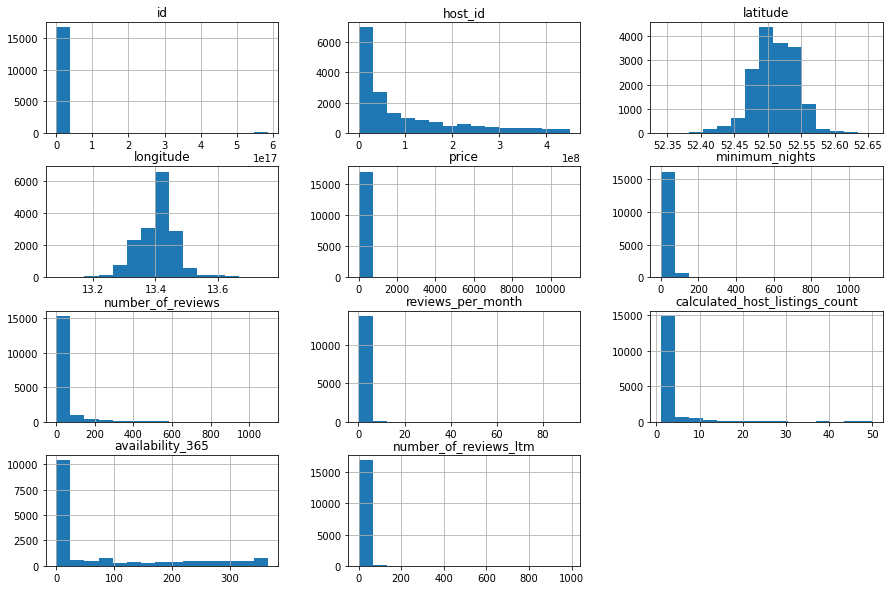

In [ ]:
df.hist(bins=15, figsize=(15,10));

#Q4. Há outliers presentes?

Pela distribuição dos histogramas, podemos verificar os indícios da presença de _outliers_, bastando olhar para as variáveis price, minimum_nights e calculated_host_listings_count, onde apresentam uma concentração de dados muito maior em determinados intervalos.
Outliers resultam numa distorção da nossa representação gráfica. Para confirmar, há duas maneiras rápidas de conferirmos os outliers em maior detalhe:
* Resumo estatístico por meio do método describe()
* Plotar boxplots para cada variável


In [ ]:
# Conferindo em maior detalhe nossas variáveis que apresentam uma distribuição anormal nos histogramas:
df[['price','minimum_nights','number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,16962.000000,16962.000000,16962.000000,13825.000000,16962.000000,16962.000000
mean,77.464745,10.857859,24.325080,0.691425,2.910270,77.705990
std,146.432360,36.426390,55.462283,1.540381,6.139532,116.864321
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,36.000000,2.000000,1.000000,0.070000,1.000000,0.000000
50%,56.000000,3.000000,5.000000,0.240000,1.000000,0.000000
75%,89.000000,5.000000,19.000000,0.770000,2.000000,141.000000
max,10999.000000,1124.000000,1096.000000,91.850000,50.000000,365.000000


Analisando o resumo estatístico acima, podemos analisar de forma mais completa a presença dos _outliers_. 

Exemplos:
* Price: Mesmo que a média de 75% do dataset (grande parte) tenha o valor de 89, o valor máximo encontrado foi de 10999.
* Minimum_nights: possui como valor máximo 1124 noites, sendo um número bem difícil de ser aplicado na realidade. 

Vamos agora analisar cada um desses atributos por meio de um boxplot:

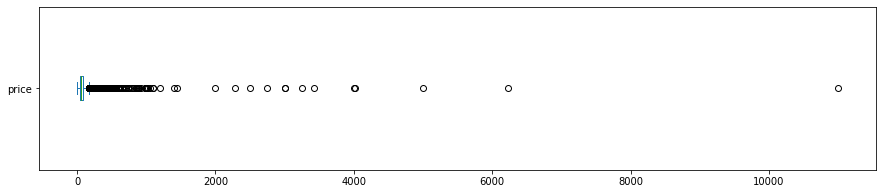

variável price - valores acima de 400:
entradas: 140 
em relacao a base toda: 0.8253743662303973%


In [ ]:
#analisando o atributo price por meio de um boxplot:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quantidade de valores acima de 400 para price
print("variável price - valores acima de 400:")
print(f'entradas: { len(df[df.price > 400]) } ')
print(f'em relacao a base toda: { len(df[df.price > 400]) / df.shape[0] * 100 }%')

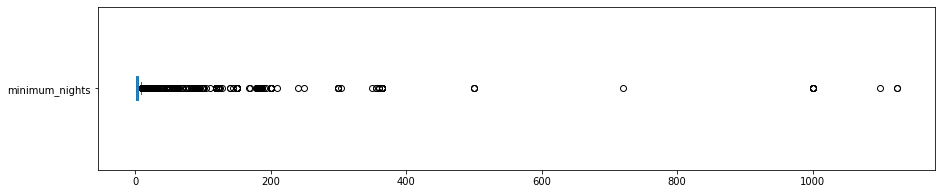

minimum_nights - valores acima de 100:
entradas: 177
em relação a toda a base: 1.0435090201627166%


In [ ]:
#analisando o atributo minimum_nights por meio de um boxplot:
df.minimum_nights.plot(kind="box", vert=False, figsize=(15, 3))
plt.show()

# vendo a quantidade de imóveis acima de 100 para minimum_nights
print("minimum_nights - valores acima de 100:")
print(f'entradas: { (df.minimum_nights > 100).sum() }')
print(f'em relação a toda a base: { (df.minimum_nights > 100).sum() / df.shape[0] * 100 }%')

##Histogramas sem outliers

Agora que identificamos _outliers_ nas variáveis price e minimum_nights, vamos agora criar um novo _DataFrame_ sem eles e plotar novamente os histogramas.

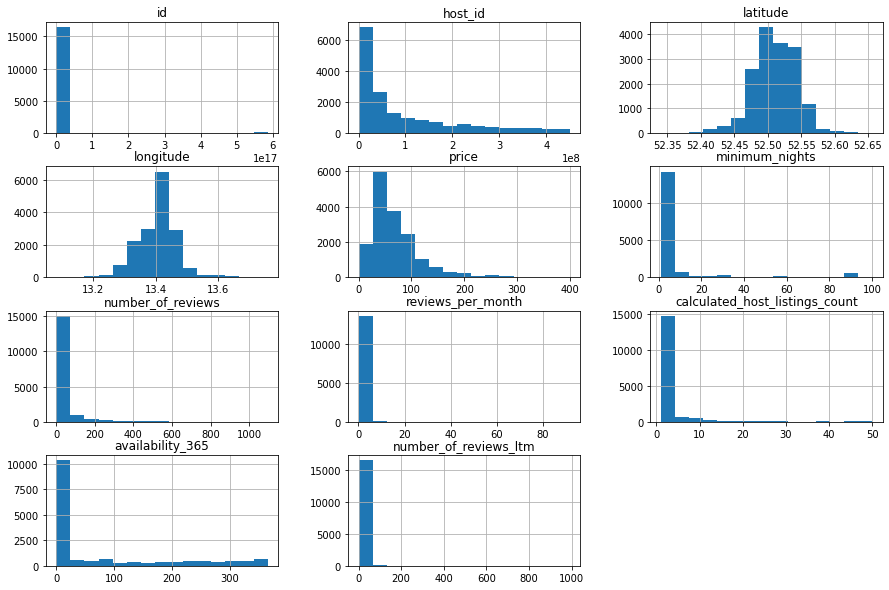

In [ ]:
# removendo os outliers do novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 400].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 100].index, axis=0, inplace=True)

# remover 'neighbourhood_group', pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

#Q4. Qual a correlação existente entre as variáveis

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn


In [ ]:
# criando uma matriz de correlação
corr = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month',
                 'calculated_host_listings_count','availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.025792,0.084105,0.112790,0.214989,0.332772
minimum_nights,-0.025792,1.000000,-0.046253,-0.064496,0.090053,0.192265
number_of_reviews,0.084105,-0.046253,1.000000,0.665480,0.057159,0.217260
reviews_per_month,0.112790,-0.064496,0.665480,1.000000,0.100200,0.271350
calculated_host_listings_count,0.214989,0.090053,0.057159,0.100200,1.000000,0.361956
availability_365,0.332772,0.192265,0.217260,0.271350,0.361956,1.000000


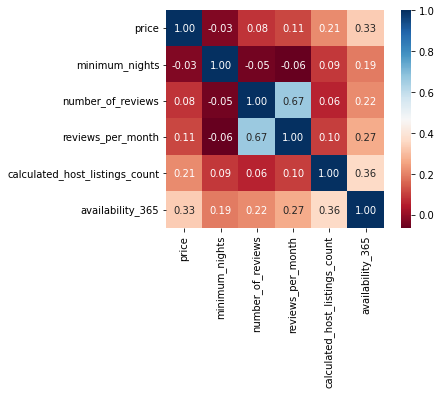

In [ ]:
sns.heatmap(corr, cmap="RdBu", fmt='.2f', square=True, linecolor='white', annot=True);

#Q5. Qual o tipo de imóvel mais alugado no Airbnb?

Consultando nosso dicionário de variáveis, percebemos que a variável room_type indica o tipo de imóvel. 

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    9456
Private room       6828
Shared room         205
Hotel room          158
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print(df_clean.room_type.value_counts() / df.shape[0])

Entire home/apt    0.557481
Private room       0.402547
Shared room        0.012086
Hotel room         0.009315
Name: room_type, dtype: float64


# Q6. Qual as 10 localidades mais caras de Belim?

Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.

In [ ]:
# agrupando o dataset por bairros e retornando a média de valor dos 10 mais caros
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Haselhorst                            179.000000
Allende-Viertel                       135.333333
Marzahn-Süd                           115.600000
Spandau Mitte                         111.782609
Kurfürstendamm                        110.741667
Regierungsviertel                     109.757576
Müggelheim                            107.357143
Malchow, Wartenberg und Falkenberg    106.000000
Heerstrasse                           102.325000
Rahnsdorf/Hessenwinkel                100.765957
Name: price, dtype: float64

Acima, podemos perceber que os bairros mais periféricos do centro de Berlim, como Haselhorst, Allende-Viertel e Marzahn apresentaram em média, um preço superior a bairros mais próximos aos centros da cidade, onde há uma maior busca por atrações turísticas.
Isso ocorre porque a nossa amostra dos bairros mais períficos da cidade apresentam poucos dados, tornando-se uma amostra não-representativa. Isso fica ainda mais nítido ao compararmos com o número de locais disponíveis para alugar no centro da cidade:

In [ ]:
#ver a quantidade de imóves nos bairros com mais entradas:
print('TOP 5 Bairros com mais Imóveis para alugar: ')
print(df_clean['neighbourhood'].value_counts().sort_values(ascending=False)[:5])

#vendo a quantidade de entradas para os bairros periféricos que apresentaram uma média superior aos bairros centrais
haselhorstNum = df_clean[df_clean['neighbourhood'] == 'Haselhorst'].shape[0]
allendeNum = df_clean[df_clean['neighbourhood'] == 'Allende-Viertel'].shape[0]
marzahnNum = df_clean[df_clean['neighbourhood'] == 'Marzahn-Süd'].shape[0]

print("Entradas de Haselhorst: ", haselhorstNum, '\n' , 
      "Entradas de Allende-Viertel :", allendeNum, '\n', 
      "Entradas de Marzahn-Sud:" , marzahnNum)

TOP 5 Bairros com mais Imóveis para alugar: 
Alexanderplatz              939
Frankfurter Allee Süd FK    918
Tempelhofer Vorstadt        820
Reuterstraße                665
Brunnenstr. Süd             633
Name: neighbourhood, dtype: int64
Entradas de Haselhorst:  12 
 Entradas de Allende-Viertel : 3 
 Entradas de Marzahn-Sud: 20


Portanto, não podemos concluir que Haselhorst ou as demais cidades periféricas apresentam o maior preço médio, pois elas apresentam pouquíssimas entradas em relação as mais centrais, como Alexanderplatz.

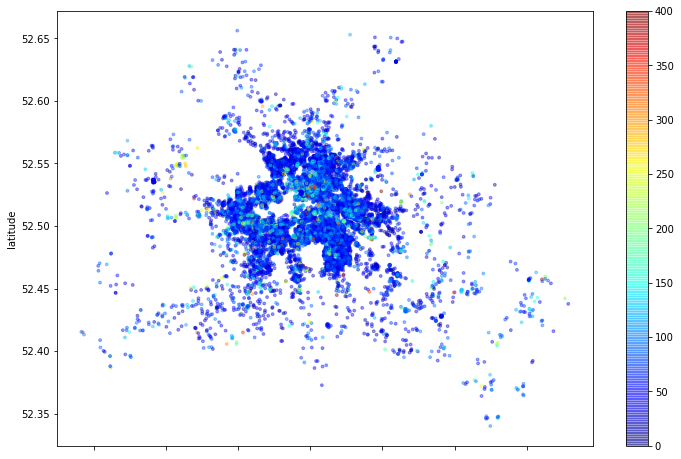

In [ ]:
# plotando imóveis pela latitude e longitude

df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

# Conclusões

Foi realizado uma análise na base de dados do Airbnb, contendo informações referentes a cidade de Berlim, na Alemanha, onde milhares de pessoas viajam todos os anos para conhecê-la.

Nosso trajeto iniciou por uma **análise exploratória dos dados**, onde identificamos fatores que seriam prejudiciais ao nosso modelo estatístico, como valores nulos e _outliers_, sendo esses últimos através dos gráficos de boxplot, que nos possibilita identificar além dos outliers, os valores máximo, mínimo e quartis. 

Após os devidos tratamentos da nossa base, iniciamos a produção de informações relevantes ao negócio, como:
* **Tipos de Imóveis mais Alugados:** 
Onde mesmo Berlim sendo uma cidade extremamente cara, apartamentos ou casas inteiras foi o tipo mais alugado.
* **Os 10 Bairros mais Caros:** Onde Haselhorst apresentou a maior média (179 Euros), porém por se tratar de um bairro mais periférico de Berlim, apresentou pouquíssimas entradas (12) em comparação as mais centrais, como Alexanderplatz, que apresentou 939.
* **Locais que Possuem mais Imóveis Alugados:** Houve uma grande tendência ao centro de Berlim, próximos a Mitte, onde há os principais pontos turísticos da cidade.